# Geospatial Analyst (MethaneSAT)
## Analytics Assignment
Written by: J. Mitchell Green

Date: 02/06/2022

**Objective**
> The objective of this assignment is to extract, analyze and visualize well-level oil and gas (O&G) production data for the state of New Mexico.

**Part 1:** (Should be completed in Python (preferred). Other programming languages are accepted for this assignment, but Python is preferred for this position):

a. We begin by performing basic data cleaning of Dataset-01. There are missing values in the “gas_prod_2021” and “oil_prod_2021” columns. Also, for some wells, the “LATITUDE” or “LONGITUDE” attributes are reported as zeros. Write code to remove any row for which both the “gas_prod_2021” and “oil_prod_2021” attributes have missing values. Keep all other rows. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# read csv into pandas dataframe
df = pd.read_csv('nm_oil_gas_prod_wells_2021_.csv')
df

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728
2,111526,MATADOR PRODUCTION COMPANY,NaN,NaN,32.269425,-103.418659
3,111527,CONOCOPHILLIPS COMPANY,NaN,NaN,32.027478,-103.690961
4,111528,CONOCOPHILLIPS COMPANY,NaN,NaN,32.028294,-103.695153
...,...,...,...,...,...,...
112046,111976,OXY USA INC,NaN,NaN,32.212702,-103.736102
112047,111977,CIMAREX ENERGY CO.,NaN,NaN,32.107890,-103.575506
112048,111978,"AMEREDEV OPERATING, LLC",NaN,NaN,32.022296,-103.277656
112049,111979,"DEVON ENERGY PRODUCTION COMPANY, LP",NaN,NaN,32.110514,-103.772580


In [4]:
# selected pandas dataframe where gas and oil columns are not null (excluding nulls from dataframe)
gas_and_oil_nulls_removed = df[(df['gas_prod_2021'].notna()) & (df['oil_prod_2021'].notna())]
gas_and_oil_nulls_removed

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106
...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888


Next, write code to remove any row for which either “LATITUDE” or “LONGITUDE” is missing or is reported as zero.

In [5]:
# removes missing lats or long (in this case there are no lat or longs with null values)
df = gas_and_oil_nulls_removed
lat_long_nulls_removed = df[(df['LATITUDE'].notna()) | (df['LONGITUDE'].notna())]
lat_long_nulls_removed

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106
...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888


In [6]:
# removes lat or long columns with values of 0
df = lat_long_nulls_removed
lat_long_zeros_removed = df[(df['LATITUDE'] != 0) | (df['LONGITUDE'] != 0)]
lat_long_zeros_removed

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106
...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888


In [7]:
# rename updated database
df = lat_long_zeros_removed
df

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106
...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888


b. Following data cleaning above, calculate each well’s combined oil and gas production in units of million barrels of oil equivalent (MMboe) and append this column (MMboe) to the cleaned dataset in (a) above. Use the equation below in your calculation:

`1 barrel of oil equivalent (boe) = Oil (barrels) + Gas (Mcf/6)`

Please name your cleaned and modified dataset as “Dataset-01A”.

In [8]:
# calculate equation, divide by one million to get 'million barrels of oil equivalent' (MMboe)
boe = df['oil_prod_2021'] + (df['gas_prod_2021']/6)
MMboe = boe/1000000
MMboe   

0         0.160639
1         0.159978
6         0.091282
8         0.071353
10        0.121484
            ...   
112038    0.205777
112042    0.153958
112043    0.248979
112044    0.065014
112050    0.082607
Length: 50543, dtype: float64

In [9]:
# add MMboe column to dataframe
Dataset_01A = df.assign(MMboe = MMboe)
Dataset_01A

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365,0.160639
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728,0.159978
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356,0.091282
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316,0.071353
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106,0.121484
...,...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436,0.205777
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804,0.153958
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824,0.248979
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888,0.065014


c. Using Dataset-02 and Dataset-01A, write code to extract the well-level data for wells that
are only within the New Mexico portion of the Permian Basin. Please name this dataset
“Dataset-01A-NM-Permian”

In [10]:
# read shapefile into GeoDataFrame (Dataset-02)
Dataset_02 = gpd.read_file("new_mexico_permian.shp")
Dataset_02.to_crs(epsg=4326)
Dataset_02

,Id,geometry
0,0,"POLYGON ((-103.04209 34.01988, -103.06465 32.0..."


In [11]:
# create wells pandas DataFrame into geopandas GeoDataFrame
wells = gpd.GeoDataFrame(Dataset_01A, geometry=gpd.points_from_xy(Dataset_01A['LONGITUDE'], Dataset_01A['LATITUDE']))
wells.set_crs(epsg=4326, inplace=True)

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe,geometry
0,111524,"DEVON ENERGY PRODUCTION COMPANY, LP",387579.0,96043.0,32.304288,-103.681365,0.160639,POINT (-103.68136 32.30429)
1,111525,EOG RESOURCES INC,242951.0,119486.0,32.181877,-103.520728,0.159978,POINT (-103.52073 32.18188)
6,111530,"CENTENNIAL RESOURCE PRODUCTION, LLC",153203.0,65748.0,32.386097,-103.423356,0.091282,POINT (-103.42336 32.38610)
8,111532,APACHE CORPORATION,140832.0,47881.0,32.674728,-104.156316,0.071353,POINT (-104.15632 32.67473)
10,111534,COG OPERATING LLC,133641.0,99211.0,32.182135,-103.429106,0.121484,POINT (-103.42911 32.18214)
...,...,...,...,...,...,...,...,...
112038,111687,COG OPERATING LLC,795717.0,73157.0,32.066039,-103.649436,0.205777,POINT (-103.64944 32.06604)
112042,111691,"LOGOS OPERATING, LLC",923747.0,0.0,36.874968,-107.408804,0.153958,POINT (-107.40880 36.87497)
112043,111692,COG OPERATING LLC,1136769.0,59518.0,32.065914,-103.651824,0.248979,POINT (-103.65182 32.06591)
112044,111693,"BTA OIL PRODUCERS, LLC",148845.0,40206.0,32.107627,-103.555888,0.065014,POINT (-103.55589 32.10763)


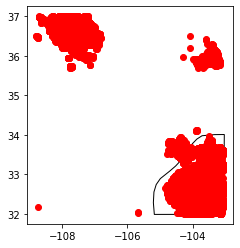

In [12]:
# test by mapping the data
nm_permian = Dataset_02.plot(color='white', edgecolor='black')
wells.plot(ax=nm_permian, color='red')
plt.show()

In [13]:
# complete a spatial join, for points with binary predicate 'within' inside permian basin
wells_join = gpd.sjoin(wells, Dataset_02, how='left', predicate='within')
# wells within permian boundary
Dataset_01A_NM_Permian = wells_join[wells_join["index_right"].notna()]
# wells outsde permain boundary
wells_outside_permian = wells_join[wells_join["index_right"].isna()]

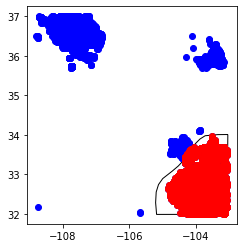

In [14]:
# test by mapping the data
nm_permian = Dataset_02.plot(color='white', edgecolor='black')
wells.plot(ax=nm_permian, color='blue')
Dataset_01A_NM_Permian.plot(ax=nm_permian, color='red')
plt.show()

d. We are interested in the top ten operators within the New Mexico portion of the Permian
Basin (based on “Dataset-01A-NM-Permian”). Write code to identify and group (in
descending order) the top ten operators based on total O&G production in 2021 (i.e.,
MMboe, as calculated in (b) above).

In [15]:
top_operators = Dataset_01A_NM_Permian.sort_values(by='MMboe', ascending=False)
top_ten_operators = top_operators.head(10)
top_ten_operators

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe,geometry,index_right,Id
109186,108662,CONOCOPHILLIPS COMPANY,1756502.0,536314.0,32.028301,-103.721296,0.829064,POINT (-103.72130 32.02830),0.0,0.0
111456,110926,CHEVRON U S A INC,1167977.0,432233.0,32.137680,-103.658324,0.626896,POINT (-103.65832 32.13768),0.0,0.0
111666,111136,XTO PERMIAN OPERATING LLC.,1875486.0,309517.0,32.102191,-103.776515,0.622098,POINT (-103.77651 32.10219),0.0,0.0
111679,111149,CHEVRON U S A INC,1077457.0,397064.0,32.137679,-103.658162,0.576640,POINT (-103.65816 32.13768),0.0,0.0
111577,111047,CHEVRON U S A INC,1029732.0,401664.0,32.137678,-103.658000,0.573286,POINT (-103.65800 32.13768),0.0,0.0
111341,110811,XTO PERMIAN OPERATING LLC.,1422039.0,317632.0,32.102191,-103.776417,0.554639,POINT (-103.77642 32.10219),0.0,0.0
113,111739,CHEVRON U S A INC,901292.0,375805.0,32.049056,-103.641454,0.526020,POINT (-103.64145 32.04906),0.0,0.0
109790,109260,MEWBOURNE OIL CO,1111786.0,312542.0,32.050676,-103.669058,0.497840,POINT (-103.66906 32.05068),0.0,0.0
111653,111123,CIMAREX ENERGY CO.,852010.0,344352.0,32.093447,-103.601459,0.486354,POINT (-103.60146 32.09345),0.0,0.0
109801,109271,MEWBOURNE OIL CO,1006602.0,316831.0,32.050678,-103.669220,0.484598,POINT (-103.66922 32.05068),0.0,0.0


 For each top ten operator, calculate the percentage
of total O&G production within the NM portion of the Permian Basin that it accounts for.

In [16]:
total_MMboe_permian = Dataset_01A_NM_Permian['MMboe'].sum()
total_MMboe_permian

337.6848381666667

In [33]:
top_ten_operators['MMboe_total_percentage'] = top_ten_operators['MMboe']/(total_MMboe_permian*100)
top_ten_operators

c:\Users\jmgreen\miniconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe,geometry,index_right,Id,MMboe_total_percentage
109186,108662,CONOCOPHILLIPS COMPANY,1756502.0,536314.0,32.028301,-103.721296,0.829064,POINT (-103.72130 32.02830),0.0,0.0,0.000025
111456,110926,CHEVRON U S A INC,1167977.0,432233.0,32.137680,-103.658324,0.626896,POINT (-103.65832 32.13768),0.0,0.0,0.000019
111666,111136,XTO PERMIAN OPERATING LLC.,1875486.0,309517.0,32.102191,-103.776515,0.622098,POINT (-103.77651 32.10219),0.0,0.0,0.000018
111679,111149,CHEVRON U S A INC,1077457.0,397064.0,32.137679,-103.658162,0.576640,POINT (-103.65816 32.13768),0.0,0.0,0.000017
111577,111047,CHEVRON U S A INC,1029732.0,401664.0,32.137678,-103.658000,0.573286,POINT (-103.65800 32.13768),0.0,0.0,0.000017
111341,110811,XTO PERMIAN OPERATING LLC.,1422039.0,317632.0,32.102191,-103.776417,0.554639,POINT (-103.77642 32.10219),0.0,0.0,0.000016
113,111739,CHEVRON U S A INC,901292.0,375805.0,32.049056,-103.641454,0.526020,POINT (-103.64145 32.04906),0.0,0.0,0.000016
109790,109260,MEWBOURNE OIL CO,1111786.0,312542.0,32.050676,-103.669058,0.497840,POINT (-103.66906 32.05068),0.0,0.0,0.000015
111653,111123,CIMAREX ENERGY CO.,852010.0,344352.0,32.093447,-103.601459,0.486354,POINT (-103.60146 32.09345),0.0,0.0,0.000014
109801,109271,MEWBOURNE OIL CO,1006602.0,316831.0,32.050678,-103.669220,0.484598,POINT (-103.66922 32.05068),0.0,0.0,0.000014


Based on your analysis:

i. What is the percentage of total statewide production (MMboe) that is contributed
by wells in the New Mexico portion of the Permian Basin?

In [18]:
total_MMboe_statewide = Dataset_01A['MMboe'].sum()
total_MMboe_statewide

417.4343523333333

In [19]:
# Percentage of total statewide MMboe contrubted by wells in the New Mexico Permian Basin
percentage_total_MMboe_by_nm_permian = total_MMboe_permian/total_MMboe_statewide*100
print("% "+ str(percentage_total_MMboe_by_nm_permian))

% 80.89531594108375


ii. In the NM portion of the Permian Basin, what is the fraction of total O&G
production (MMboe) that is contributed by the top 10 operators?

In [20]:
# calculate sum of MMboe 
total_MMboe_top_ten = top_ten_operators['MMboe'].sum()
total_MMboe_top_ten

5.7774345

In [21]:
#  calculate fraction of MMboe that is contributed by top 10 operators
percentage_total_MMboe_by_top_ten = total_MMboe_top_ten/total_MMboe_permian*100
print("% " + str(percentage_total_MMboe_by_top_ten))

% 1.7108954406618953


iii. Write code to extract the well-level production data for the top operator in the NM
portion of the Permian Basin. This data will be needed for visualization in Part 1
(e) below.

In [22]:
# Rank number 1 of top ten operators
top_operator = top_operators.iloc[[0]]
top_operator

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe,geometry,index_right,Id
109186,108662,CONOCOPHILLIPS COMPANY,1756502.0,536314.0,32.028301,-103.721296,0.829064,POINT (-103.72130 32.02830),0.0,0.0


e. Generate one figure (2D map) that shows the following:
1. Point locations of wells outside of the NM portion of the Permian Basin (label:
“Non-Permian Wells (NM)”)
1. Point locations of wells within the NM portion of the Permian Basin (Dataset-01ANM-
Permian, label: “NM Permian Wells”)
1. Overlay on this map, the point locations of wells operated by the top operator
identified in (d)(iii) above (label: “Top Operator Wells”)
1. Overlay the NM Permian boundary (Dataset-02) and the NM state boundary
(Dataset-03)
Please use appropriate color choices that make it easier to visualize each data.
1. Include the following in the title: “NM Permian # wells = ABC (XY% of all wells in
NM)” where ABC is the total number of wells in the NM portion of the Permian
Basin, and XY% is the percent of total number of all wells in NM that are located
in the NM portion of the Permian Basin.

In [23]:
# Percent of total of all wells in NM that are located in the NM portion of the Permian basin
print("% "+ str(Dataset_01A_NM_Permian.shape[0]/wells.shape[0]*100))

% 58.150485725026215


In [24]:
# read geojson
new_mexico_bnd = gpd.read_file('new_mexico_bnd.geojson')

In [25]:
from matplotlib.lines import Line2D

In [26]:
# create custom legend items
legend_elements = [Line2D([0],[0], color='white', marker='o', markerfacecolor='grey', label='Non-Permian Wells (NM)'),
                    Line2D([0],[0], color='white', marker='o', markerfacecolor='steelblue', label='NM Permian Wells'),
                    Line2D([0],[0], color='black', markersize=20, marker='*', markerfacecolor='gold', label='Top Operator Wells'),
                    Line2D([0],[0], color='green', linestyle='--', label='NM Permian Basin'),
                    Line2D([0],[0], color='black', label='New Mexico Boundary')]

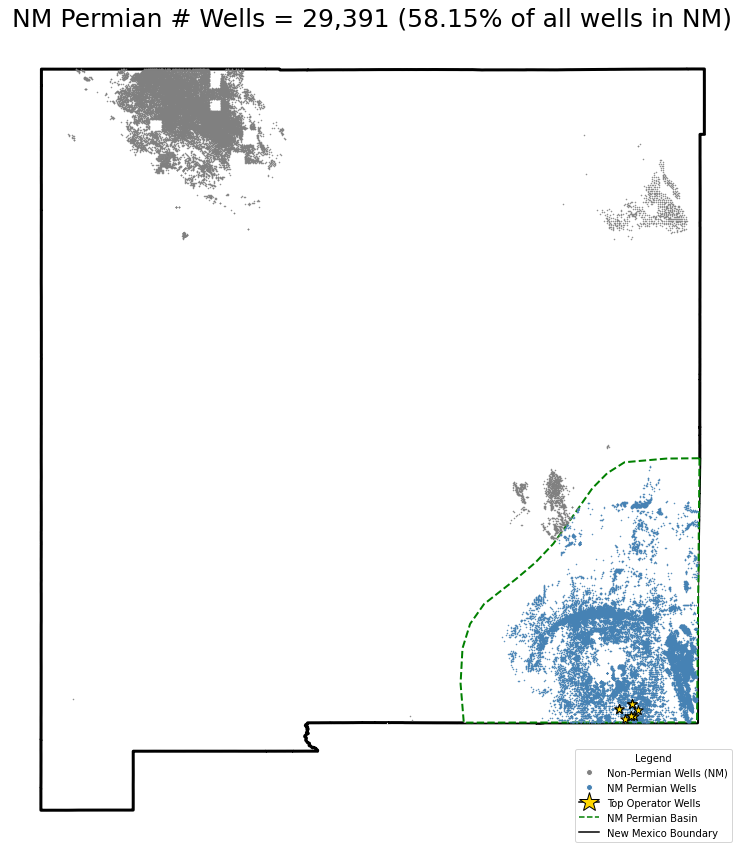

In [27]:
# apply matplotlib and geopandas to create map figure
fig, ax = plt.subplots(1,1, figsize = (15, 15))
ax.set_aspect('equal')
new_mexico_bnd.plot(ax=ax, color='white', edgecolor='black', linewidth=3)
Dataset_02.plot(ax=ax, color='white', linestyle='--', edgecolor='green', linewidth=2)
top_ten_operators.plot(ax=ax, marker='*', markersize=100, color='gold', edgecolor='black', zorder=3)
wells_outside_permian.plot(ax=ax, marker='.', markersize=1, color='grey')
Dataset_01A_NM_Permian.plot(ax=ax, marker='.', markersize=1, color='steelblue')
# 
ax.legend(title="Legend", handles=legend_elements, loc='lower right')
ax.set_title("NM Permian # Wells = 29,391 (58.15% of all wells in NM)", fontsize=25)
ax.set_axis_off()
plt.show()

In [28]:
# for QGIS analysis
wells.to_csv('Dataset_01A.csv')

A summary table of the top ten operators in the NM portion of the Permian Basin. Your table should include the operator name, its rank, combined oil and gas production (MMboe) totals for 2021, and percentage of total O&G production within the NM portion of the Permian Basin that it accounts for.

In [29]:
# pp = powerpoint
top_ten_operators_pp = top_ten_operators
top_ten_operators_pp.head(1)

,id,OPERATOR,gas_prod_2021,oil_prod_2021,LATITUDE,LONGITUDE,MMboe,geometry,index_right,Id,MMboe_total_percentage
109186,108662,CONOCOPHILLIPS COMPANY,1756502.0,536314.0,32.028301,-103.721296,0.829064,POINT (-103.72130 32.02830),0.0,0.0,0.245514


In [30]:
# remove unnecessary columns
top_ten_operators_pp = top_ten_operators_pp.drop(['id', 'geometry', 'gas_prod_2021', 'oil_prod_2021', 'index_right', 'Id','LATITUDE','LONGITUDE'], axis=1)
top_ten_operators_pp = top_ten_operators_pp.reset_index(drop=True)

In [31]:
# add rank column
top_ten_operators_pp.insert(loc=0, column='rank', value=[i for i in range(1,11)])

In [32]:
top_ten_operators_pp

,rank,OPERATOR,MMboe,MMboe_total_percentage
0,1,CONOCOPHILLIPS COMPANY,0.829064,0.245514
1,2,CHEVRON U S A INC,0.626896,0.185645
2,3,XTO PERMIAN OPERATING LLC.,0.622098,0.184224
3,4,CHEVRON U S A INC,0.576640,0.170763
4,5,CHEVRON U S A INC,0.573286,0.169770
5,6,XTO PERMIAN OPERATING LLC.,0.554639,0.164247
6,7,CHEVRON U S A INC,0.526020,0.155773
7,8,MEWBOURNE OIL CO,0.497840,0.147427
8,9,CIMAREX ENERGY CO.,0.486354,0.144026
9,10,MEWBOURNE OIL CO,0.484598,0.143506
